# Chapter 03 Brownian Motion

金融随机分析(Stochastic Calculus for Finance II Continuous-Time Models)第3章部分章节可视化笔记

## 3.2 Scaled Random Walks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
np.random.seed(1024)

### 3.2.1 Symmetric Random Walk

$$
X_j=\left\{\begin{array}{ll}
1, & \text{if} \ \omega_j = H \\
-1 &  \text{if} \ \omega_j = T
\end{array}\right.
$$

$$
M_0 = 0, \ M_k = \sum_{j=1}^{k} X_j, \ \text{for} \ k = 1, 2, ...
$$

In [3]:
t = 20
steps = np.append(np.arange(0, t, 1), t)
random_walks = np.random.randint(0, 2, size=t) * 2 - 1
random_walks.shape

(20,)

In [4]:
print(random_walks.mean())
print(random_walks.var())

0.4
0.8399999999999999


In [5]:
random_walks = np.append(np.array([0]),random_walks)
random_walks = random_walks.cumsum()

In [6]:
def plot_random_walks(step, random_walk):
    plt.plot(step, random_walk)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Location", fontsize=14)
    plt.grid()

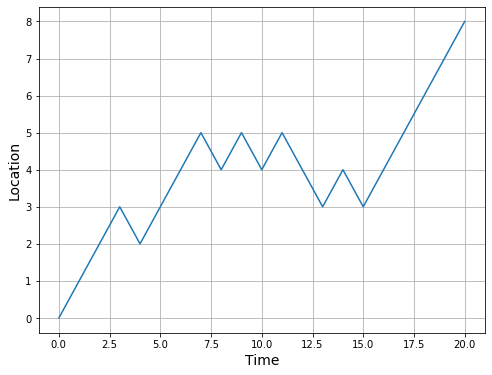

In [7]:
plt.figure(figsize=(8, 6))
plot_random_walks(steps, random_walks)

### 3.2.5 Scaled Symmetric Random Walk

将对称随机游动缩小$n$倍，并保证$nt$为正整数，则有

$$
W ^ {(n)} (t) = \frac{1}{\sqrt{n}} M_{nt}
$$

In [8]:
nstep = 100

In [9]:
steps = np.append(np.arange(0, t, 1/nstep), t)

In [10]:
steps.shape

(2001,)

In [11]:
random_walks = 1 / np.sqrt(nstep) * (np.random.randint(0, 2, size=nstep*t) * 2 - 1)
random_walks = np.append(np.array([0]),random_walks)
random_walks = random_walks.cumsum()

In [12]:
random_walks.shape

(2001,)

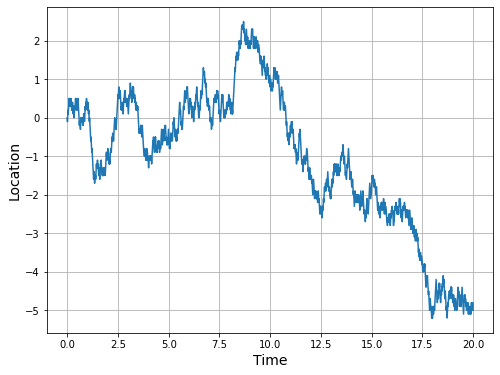

In [13]:
plt.figure(figsize=(8, 6))
plot_random_walks(steps, random_walks)

In [14]:
nwalks = 10
random_walks = 1 / np.sqrt(nstep) * (np.random.randint(0, 2, size=(nwalks, nstep*t)) * 2 - 1)

In [15]:
random_walks = np.append(np.zeros((nwalks, 1)),random_walks, axis=1)
random_walks = random_walks.cumsum(axis=1)

In [16]:
random_walks.shape

(10, 2001)

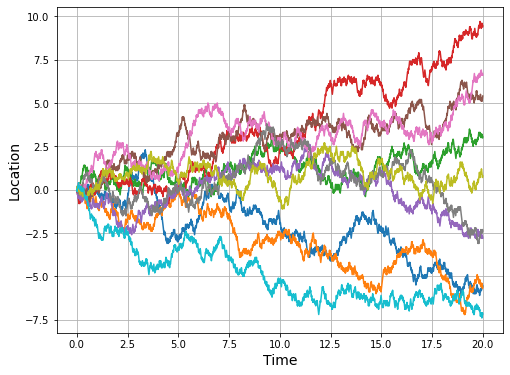

In [17]:
plt.figure(figsize=(8, 6))
for i in range(len(random_walks)):
    plot_random_walks(steps, random_walks[i])
plt.grid()

### 3.2.6 Limiting Distribution of the Scaled Random Walk

In [18]:
nstep = 1000
steps = np.append(np.arange(0, t, 1/nstep), t)
nwalks = 10000

random_walks = 1 / np.sqrt(nstep) * (np.random.randint(0, 2, size=(nwalks, nstep*t)) * 2 - 1)
random_walks = np.append(np.zeros((nwalks, 1)),random_walks, axis=1)
random_walks = random_walks.cumsum(axis=1)
random_walks.shape

(10000, 20001)

In [19]:
random_walks_final = random_walks[:, nstep*t]

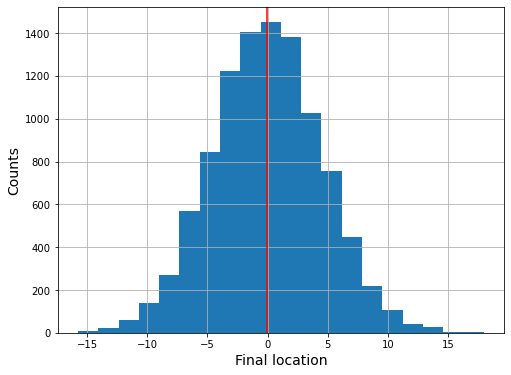

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(random_walks_final, bins=20)
plt.axvline(random_walks_final.mean(), color='r')
plt.xlabel("Final location", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()

In [21]:
print(random_walks_final.mean())
print(random_walks_final.var())

-0.0257725629303726
20.436329775000004


### 3.2.7 Log-Normal Distribution as the Limit of the Binomial Model

#### 首先，我们考虑下**Theorem 3.2.2**提及的$r = 0$时特殊情形

假设估价上升因子为$u_n = 1 + \frac{\sigma}{\sqrt{n}}$，上升概率为$\tilde{p} = \frac{1 + r - d_n}{u_n - d_n} = \frac{\frac{\sigma}{\sqrt{n}}}{2 \frac{\sigma}{\sqrt{n}}} = \frac{1}{2}$，下降因子为$d_n = 1 - \frac{\sigma}{\sqrt{n}}$，下降概率为$\tilde{q} = \frac{u_n - 1 - r}{u_n - d_n} = \frac{\frac{\sigma}{\sqrt{n}}}{2 \frac{\sigma}{\sqrt{n}}} = \frac{1}{2}$。

可求得

$$
nt = H_{nt} + T_{nt}
$$

$$
M_{nt} = H_{nt} - T_{nt}
$$

$$
H_{nt} = \frac{1}{2} (nt + M_{nt})
$$

$$
T_{nt} = \frac{1}{2} (nt - M_{nt})
$$

股价$S_n(t)$可以表示为$S(0)$为起点，上升$H_{nt}$次和下降$T_{nt}$次以后的金额即：

$$
S_n(t) = S(0) u_n ^ {H_{nt}} d_n ^ {T_{nt}} = S(0) \ \left( 1 + \frac{\sigma}{\sqrt{n}} \right) ^ {\frac{1}{2} (nt + M_{nt})} \left( 1 - \frac{\sigma}{\sqrt{n}} \right) ^ {\frac{1}{2} (nt - M_{nt})}
$$

根据**Theorem 3.2.2**，当$n \to \infty$时:

$$
\lim_{n \to \infty} S_n(t) = S_0 \exp \left\{ \sigma W(t) - \frac{1}{2} \sigma ^2 t \right\}
$$

In [22]:
nstep = 100
t = 10
nwalks = 10

r = 0
sigma = 0.05
S_0 = 100
u_n = 1 + sigma/np.sqrt(nstep)
d_n = 1 - sigma/np.sqrt(nstep)
p = 0.5
q = 0.5

In [23]:
steps = np.append(np.arange(0, t, 1/nstep), t)

In [24]:
X_nt = np.random.randint(0, 2, size=(nwalks,nstep*t)) * 2 - 1
M_nt = np.append(np.zeros((nwalks, 1)), X_nt, axis=1)
M_nt = M_nt.cumsum(axis=1)

In [25]:
M_nt.shape

(10, 1001)

In [26]:
H_nt = 0.5 * (nstep*t + M_nt)
T_nt = 0.5 * (nstep*t - M_nt)

In [27]:
S_t = S_0 * pow(u_n, H_nt) * pow(d_n, T_nt)

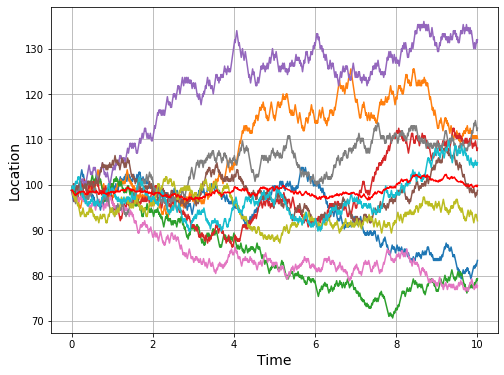

In [28]:
plt.figure(figsize=(8, 6))
for i in range(nwalks):
    plot_random_walks(steps, S_t[i])
plt.plot(steps, S_t.mean(axis=0), color='r')
plt.grid()

> $\sigma$的定义如下，注意此$\sigma$非随机游走模拟终值分布的$\sigma$

$$
\frac{1}{T_2 - T_1} \lim_{j=0}^{n-1} \left( \log \frac{S(t_{j+1})}{S(t_j)} \right) ^2 \ \approx \ \sigma ^ 2
$$

>以下我们随机选择一条路径进行计算验证

In [29]:
i = np.random.randint(nwalks)
walks = S_t[i]
walks_list = list(walks)
walks_list_ = [walks_list[i+1]/walks_list[i] for i in range(len(walks_list)-1)]
walks = np.array(walks_list_)
walks = np.log(walks)
walks = walks * walks
sigma = np.sqrt(np.sum(walks) / t)
sigma

0.0500004166729163

> $\sigma$的金额与我们前面设定的金额一致。

In [30]:
from numpy import random

nwalks = 10000
random_walks = random.choice([u_n, d_n], p=[p, q], size=(nwalks, nstep*t))
random_walks = np.append(np.ones((nwalks, 1)),random_walks, axis=1)
random_walks_cumprod = random_walks.cumprod(1)

paths = random_walks_cumprod[:, nstep*t]
paths = paths * S_0

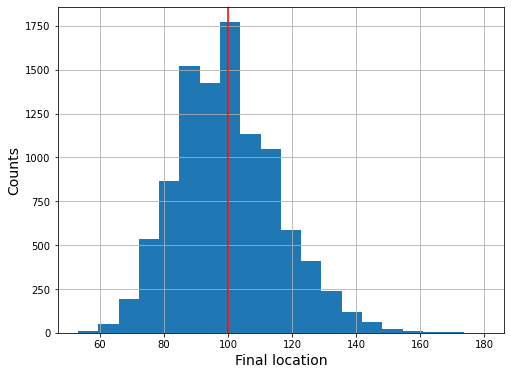

In [31]:
bins = 20
plt.figure(figsize=(8, 6))
plt.hist(paths, bins = bins)
plt.axvline(paths.mean(), color='r')
plt.xlabel("Final location", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()

几何布朗运动及其均值与方差（详细推导见以下3.8节）:

$$
S_t = S_0 \exp \left( \sigma W(t) + (r - \frac{\sigma^2}{2})t\right) \tag{1.31}
$$

$$
\mathbb{E} (S_t) = S_0 e ^ {r t}
$$

$$
\mathbb{Var}(S_t) = S_0 ^ 2 e ^ {2 r t} \left( e ^ {\sigma ^ 2 t} - 1\right)
$$

In [32]:
sample_mean = paths.mean()
theoretical_mean = S_0 * np.exp(r*t)

sample_std = paths.std()
theoretical_std = np.sqrt(S_0 * S_0 * np.exp(2*r*t) * (np.exp(sigma * sigma * t) - 1))

print("sample_mean = %f" % sample_mean)
print("theoretical_mean = %f" % theoretical_mean)

print("sample_std = %f" % sample_std)
print("theoretical_std = %f" % theoretical_std)

sample_mean = 99.950854
theoretical_mean = 100.000000
sample_std = 15.860752
theoretical_std = 15.910860


将终值金额取对数，绘制其直方图并比较其均值和方差与理论值的一致性。

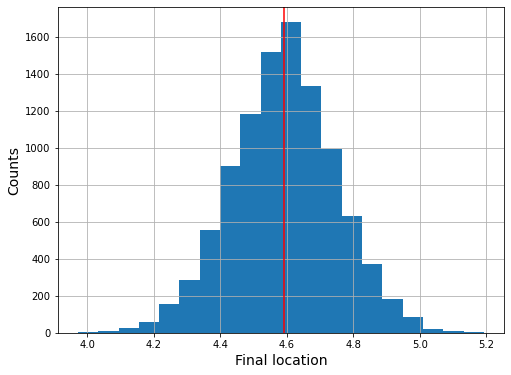

In [33]:
log_paths = np.log(paths)

plt.figure(figsize=(8, 6))
plt.hist(log_paths, bins = bins)
plt.axvline(log_paths.mean(), color='r')
plt.xlabel("Final location", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()

In [34]:
sample_mean = log_paths.mean()
theoretical_mean = np.log(S_0) + (r - 0.5 * sigma * sigma) * t

sample_var = log_paths.var()
theoretical_var = sigma * sigma * t

print("sample_mean = %f" % sample_mean)
print("theoretical_mean = %f" % theoretical_mean)

print("sample_var = %f" % sample_var)
print("theoretical_var = %f" % theoretical_var)

sample_mean = 4.592218
theoretical_mean = 4.592670
sample_var = 0.024949
theoretical_var = 0.025000


通过计算可知，模拟结果的均值及方差与理论值较为吻合。

#### 其次，我们考虑Exercise 3.8涉及的一般情形

我们用$n$期二叉树模型模拟单位时间间隔内的股价变化，单位时间内的利率为$r_n = \frac{r}{n}$，假设上升因子为$u_n = e ^ {\frac{\sigma}{\sqrt{n}}}$，下降因子为$d_n = e ^ {-\frac{\sigma}{\sqrt{n}}}$。则

$$
\tilde{p}_n = \frac{1+r_n-d_n}{u_n-d_n} = \frac{1+\frac{r}{n} - e ^ {-\sigma/ \sqrt{n}}} {e ^ {\sigma/ \sqrt{n}} - e ^ {-\sigma/ \sqrt{n}}} \tag{1.21}
$$

$$
\tilde{q}_n = \frac{u_n-1-r_n}{u_n-d_n} = \frac{e ^ {\sigma/ \sqrt{n}} -1 -\frac{r}{n}} {e ^ {\sigma/ \sqrt{n}} - e ^ {-\sigma/ \sqrt{n}}}   \tag{1.22}
$$

选取$t = t_1 - t_0$，满足$nt$为整数，我们用$nt$期二叉树模拟$t$时间内的股价。定义

$$
M_{nt,n} = \sum_{k=1}^{nt} X_{k,n} \tag{1.23}
$$

其中$X_{1,n}, X_{2,n} ... X_{n,n}$为独立同分布随机变量，满足

$$
\widetilde{\mathbb{P}}(X_{k,n} = 1) = \tilde{p}_n,\ \ \widetilde{\mathbb{P}}(X_{k,n} = -1) = \tilde{q}_n, \ k = 1,2,...n.
$$

记$nt$次二叉树模拟内出现股价上升的次数为$H_{nt}$，出现下降的次数为$T_{nt}$，则$nt = H_{nt} + T_{nt}$，$M_{nt,n} = H_{nt} - T_{nt}$。由此可得：

$$
H_{nt} = \frac{1}{2}(nt + M_{nt,n})
$$

$$
T_{nt} = \frac{1}{2}(nt - M_{nt,n})
$$

$t$时刻股价经过$nt$期二叉树模拟后可由下式得出

$$
\begin{aligned}
S_n(t) &= S_0 u_{n}^{H_{nt,n}} d_{n}^{T_{nt,n}} = S_0 u_{n}^{\frac{1}{2}(nt + M_{nt,n})} d_{n}^{\frac{1}{2}(nt - M_{nt,n})} \\
\\
&= S_0 \exp \left(\frac{\sigma}{2\sqrt{n}}(nt + M_{nt,n})\right) \exp \left(-\frac{\sigma}{2\sqrt{n}}(nt - M_{nt,n})\right) \\
\\
&= S_0 \exp \left(\frac{\sigma}{\sqrt{n}}M_{nt,n} \right)
\end{aligned} \tag{1.24}
$$

如果我们能求得$n \to \infty$时$\frac{\sigma}{\sqrt{n}}M_{nt,n}$的分布$\chi$，则股价$S(t)$的分布也就随之可以确定。根据习题提示，我们分4步进行证明。

$$
\blacksquare \Box \square
$$

##### 1. 根据矩生成函数与概率分布的一一对应关系，我们可以考虑求解$\frac{1}{\sqrt{n}}M_{nt,n}$的矩生成函数$\varphi_n(u)$，然后再求其极限。

$$
\begin{aligned}
\varphi_n(u) &= \widetilde{\mathbb{E}} \left( e ^ {u \frac{1}{\sqrt{n}}M_{nt,n}} \right) \\
\\
&= \left[ \widetilde{\mathbb{E}} \left( e ^ {u \frac{1}{\sqrt{n}}X_{1,n}} \right) \right] ^{nt} \\
\\
&= \left( e^{\frac{u}{\sqrt{n}} \tilde{p}_n} + e^{-\frac{u}{\sqrt{n}} \tilde{q}_n} \right) ^{nt} \\
\\
&= \left[ e^{\frac{u}{\sqrt{n}}} \left(\frac{1+\frac{r}{n} - e ^ {-\sigma/ \sqrt{n}}} {e ^ {\sigma/ \sqrt{n}} - e ^ {-\sigma/ \sqrt{n}}}\right) +  e^{-\frac{u}{\sqrt{n}}} \left(\frac{e ^ {\sigma/ \sqrt{n}}-1-\frac{r}{n}} {e ^ {\sigma/ \sqrt{n}} - e ^ {-\sigma/ \sqrt{n}}}\right)\right] ^{nt}
\end{aligned} \tag{1.25}
$$

##### 2. 上式关于离散变量$n$的极限转换为关于连续变量$x$的极限。

选取$x = \frac{1}{\sqrt{n}}$，则

$$
\lim_{n \to \infty}\varphi_n(u) = \lim_{x \to 0}\varphi_{\frac{1}{x^2}}(u)
$$

$$
\lim_{x \to 0} \varphi_{\frac{1}{x^2}}(u) = \left[ e^{ux} \left(\frac{1+rx^2 - e ^ {-\sigma x}} {e ^ {\sigma x} - e ^ {-\sigma x}}\right) +  e^{-ux} \left(\frac{e ^ {\sigma x}-1-rx^2} {e ^ {\sigma x} - e ^ {-\sigma x}}\right)\right] ^{\frac{t}{x^2}} \tag{1.26}
$$

##### 3. 由于指数函数不易求极限，我们转而求其对数函数$\log \left[ \varphi_{\frac{1}{x^2}}(u) \right]$

通过观察分母的形式，我们考虑构造双曲函数，然后利用双曲函数的以下性质：

$$
\text{sinh}z = \frac{e^z - e^{-z}}{2}
$$

$$
\text{cosh}z = \frac{e^z + e^{-z}}{2}
$$

$$
\text{sinh}(A-B) = \text{sinh}A \text{cosh}B - \text{cosh}A\text{sinh}B
$$


对公式(1.26)进行化简如下：

$$
\begin{aligned}
\lim_{x \to 0} \log \left[\varphi_{\frac{1}{x^2}}(u)\right] &= \lim_{x \to 0} \frac{t}{x^2} \log \left[ e^{ux} \left(\frac{1+rx^2 - e ^ {-\sigma x}} {e ^ {\sigma x} - e ^ {-\sigma x}}\right) +  e^{-ux} \left(\frac{e ^ {\sigma x}-1-rx^2} {e ^ {\sigma x} - e ^ {-\sigma x}}\right)\right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ \frac{(1+rx^2)e^{ux} + e^{(u-\sigma)x}} {e^{\sigma x} - e^{-\sigma x}} + \frac{e^{(\sigma-u)x} - (1+rx^2)e^{-ux}} {e^{\sigma x} - e^{-\sigma x}} \right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ \frac{(1+rx^2) (e^{ux}-e^{-ux}) + e^{(\sigma-u)x} - e^{-(\sigma-u)x}} {e^{\sigma x} - e^{-\sigma x}} \right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ \frac{(1+rx^2) \cdot 2 \cdot \text{sinh}ux + 2 \cdot \text{sinh}(\sigma-u)x} {2 \cdot \text{sinh}\sigma x} \right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ \frac{(1+rx^2) \text{sinh}ux + \text{sinh}(\sigma-u)x} {\text{sinh}\sigma x}\right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ \frac{(1+rx^2)\text{sinh}ux + \text{sinh}\sigma x \cdot \text{cosh}ux -\text{cosh}\sigma x \cdot \text{sinh}ux} {\text{sinh}\sigma x} \right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ \text{cosh}ux + \frac{(1+rx^2-\text{cosh}\sigma x) \text{sinh}ux} {\text{sinh}\sigma x}\right]
\end{aligned} \tag{1.27}
$$

然后利用以下双曲函数的泰勒级数展开式:

$$
\text{sinh} z = z + O(z^3)
$$

$$
\text{cosh} = 1 + \frac{z^2}{2} + O(z^4)
$$

对公式(1.27)继续化简:

$$
\begin{aligned}
\lim_{x \to 0} \log \left[\varphi_{\frac{1}{x^2}}(u)\right] &= \lim_{x \to 0} \frac{t}{x^2} \log \left[ \text{cosh}ux + \frac{(1+rx^2-\text{cosh}\sigma x) \text{sinh}ux} {\text{sinh}\sigma x}\right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ 1 + \frac{(ux)^2}{2} + O(x^4) + \frac{[ 1+rx^2 - 1 - \frac{(\sigma x)^2}{2} + O(x^4) ]\cdot[ux+O(x^3)]} {\sigma x + O(x^3)} \right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ 1 + \frac{u^2x^2}{2} + \frac{(r-\frac{\sigma ^2}{2})ux^3 + O(x^5)} {\sigma x + O(x^3)} + O(x^4) \right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ 1 + \frac{u^2x^2}{2} + \frac{(r-\frac{\sigma ^2}{2})ux^3 (1+O(x^2))} {\sigma x(1 + O(x^2))} + O(x^4) \right] \\
\\
&= \lim_{x \to 0} \frac{t}{x^2} \log \left[ 1 + \frac{u^2x^2}{2} + \frac{rux^2}{\sigma} - \frac{\sigma ux^2}{2}+ O(x^4) \right]
\end{aligned} \tag{1.28}
$$

##### 4. 利用 $\text{log}(1+x) = x + O(x^2)$ 进一步化简上式

$$
\begin{aligned}
\lim_{x \to 0} \log \left[\varphi_{\frac{1}{x^2}}(u) \right]&= \lim_{x \to 0} \frac{t}{x^2} \left[ \frac{u^2x^2}{2} + \frac{rux^2}{\sigma} - \frac{\sigma ux^2}{2}+ O(x^4) \right] \\
\\
&= t \left( \frac{u^2}{2} + \frac{ru}{\sigma} - \frac{\sigma u}{2}\right) \\
\\
&= \frac{t}{2}u^2 + t \left( \frac{r}{\sigma}-\frac{\sigma}{2} \right)u
\end{aligned} \tag{1.29}
$$

由公式(1.29)可得当$n \to \infty$时,

$$
\varphi_n(u) \to \exp \left( \frac{t}{2}u^2 + t ( \frac{r}{\sigma}-\frac{\sigma}{2} )u \right)
$$

$$
\Box \square \blacksquare
$$

我们知道正态随机变量$X$的矩生成函数为

$$
\varphi_X(u) = \exp \left( \frac{\sigma^2}{2}u^2 + \mu u \right) \tag{1.30}
$$

其中$\mu$为均值，$\sigma$为标准差。由此，我们可以得出当$n \to \infty$时，$\frac{1}{\sqrt{n}}M_{nt,n}$趋近于均值为$(\frac{r}{\sigma}-\frac{\sigma}{2})t$，标准差为$\sqrt{t}$的正态分布。亦即$\frac{\sigma}{\sqrt{n}}M_{nt,n}$趋近于均值为$(r-\frac{\sigma^2}{2})t$，标准差为$\sigma \sqrt{t}$的正态分布。而这正与分布$\sigma W(t) + (r - \frac{\sigma^2}{2})t,\ W(t)$为布朗运动相吻合，因此我们可以将$\lim_{n \to \infty} S_n(t) = S_t$写成如下形式

$$
S_t = S_0 \exp \left( \sigma W(t) + (r - \frac{\sigma^2}{2})t\right) \tag{1.31}
$$

下面我们继续求$dS_t$即股价变动的表达式，令

$$
X_t = \sigma W(t) + (r - \frac{\sigma^2}{2})t
$$

$$
f(X_t) = S_t= S_0 e^{X_t}
$$

则

$$
{f}'(X_t) = {f}''(X_t) = f(X_t)
$$

$$
d X_t = \sigma d W(t) + (r - \frac{\sigma^2}{2}) d t
$$

$$
d X_t d X_t = \sigma^2 d t
$$

根据伊藤公式可得:

$$
\begin{aligned}
d S_t &= {f}'(X_t) d X_t + \frac{1}{2} {f}''(X_t) d X_t d X_t \\
\\
&= S_t d X_t + \frac{1}{2} S_t d X_t d X_t \\
\\
&= \sigma S_t d W(t) + r S_t dt - \frac{\sigma^2}{2}S_t dt + \frac{\sigma^2}{2}S_t dt\\
\\
&= \sigma S_t d W(t) + r S_t dt
\end{aligned} \tag{1.32}
$$

这样，我们就通过公式(1.31)求得了公式(1.32)，反之，我们也可以由公式(1.32)求得公式(1.31)，即二者互相等价。

In [35]:
nstep = 1000
npaths = 10000
r = 0.03
sigma = 0.2
S_0 = 100
t = 8

In [36]:
r_n = r / nstep
u_n = np.exp(sigma / np.sqrt(nstep))
d_n = np.exp(-sigma / np.sqrt(nstep))
p_n = (1 + r_n - d_n) / (u_n - d_n)
q_n = (u_n - 1 - r_n) / (u_n - d_n)

In [37]:
print("r_n = %f" % r_n)
print("u_n = %f" % u_n)
print("d_n = %f" % d_n)
print("p_n = %f" % p_n)
print("q_n = %f" % q_n)

r_n = 0.000030
u_n = 1.006345
d_n = 0.993695
p_n = 0.500791
q_n = 0.499209


In [38]:
from collections import Counter #用于计算array中数值出现次数
import time

In [39]:
simples = 10000000
risk_neutral_probability = random.choice([u_n, d_n], p=[p_n, q_n], size=(simples))

simple_pn = Counter(risk_neutral_probability)[u_n] / simples
simple_qn = Counter(risk_neutral_probability)[d_n] /simples

print("simple_pn = %f" % simple_pn)
print("simple_qn = %f" % simple_qn)

simple_pn = 0.500771
simple_qn = 0.499229


步数足够大时，样本概率分布趋近于理论计算的风险中性概率

In [40]:
start = time.time()

steps = np.append(np.arange(0, t, 1/nstep), t) 
rnp = random.choice([u_n, d_n], p=[p_n, q_n], size=(npaths, nstep*t))
rnp = np.append(np.ones((npaths, 1)), rnp, axis=1)
rnp_cumpd = rnp.cumprod(1)

paths = rnp_cumpd[:, nstep*t]
paths = paths * S_0

end = time.time()
print(end-start)

2.0421576499938965


In [41]:
paths.shape

(10000,)

In [42]:
print(paths.mean())

125.57620060471794


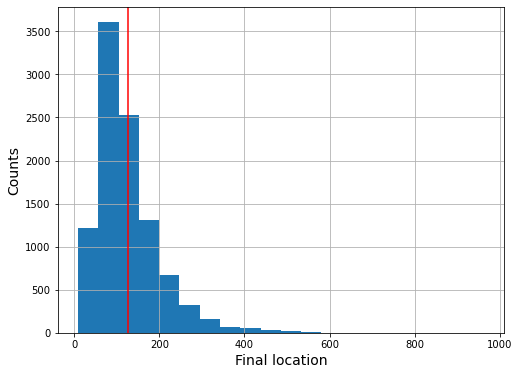

In [43]:
plt.figure(figsize=(8, 6))
plt.hist(paths, bins = bins)
plt.axvline(paths.mean(), color='r')
plt.xlabel("Final location", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()

In [44]:
sample_mean = paths.mean()
theoretical_mean = S_0 * np.exp(r*t)

sample_std = paths.std()
theoretical_std = np.sqrt(S_0 * S_0 * np.exp(2*r*t) * (np.exp(sigma * sigma * t) - 1))

print("sample_mean = %f" % sample_mean)
print("theoretical_mean = %f" % theoretical_mean)

print("sample_std = %f" % sample_std)
print("theoretical_std = %f" % theoretical_std)

sample_mean = 125.576201
theoretical_mean = 127.124915
sample_std = 75.941466
theoretical_std = 78.068337


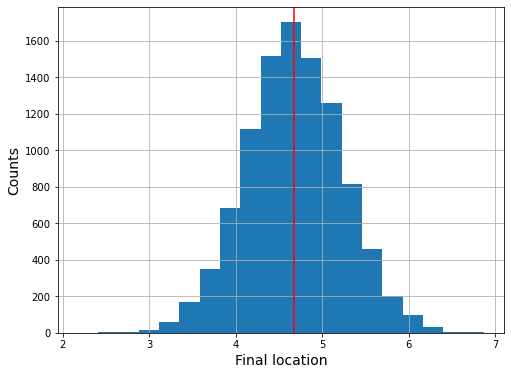

In [45]:
log_paths = np.log(paths)

plt.figure(figsize=(8, 6))
plt.hist(log_paths, bins = bins)
plt.axvline(log_paths.mean(), color='r')
plt.xlabel("Final location", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid()

In [46]:
sample_mean = log_paths.mean()
theoretical_mean = np.log(S_0) + (r - 0.5 * sigma * sigma) * t

sample_var = log_paths.var()
theoretical_var = sigma * sigma * t

print("sample_mean = %f" % sample_mean)
print("theoretical_mean = %f" % theoretical_mean)

print("sample_var = %f" % sample_var)
print("theoretical_var = %f" % theoretical_var)

sample_mean = 4.677318
theoretical_mean = 4.685170
sample_var = 0.311049
theoretical_var = 0.320000


通过计算可知，在$r \neq 0$的一般情况下，模拟结果的均值及方差与理论值较为吻合。

## 3.7 Reflection Principle

### 3.7.1 理论结果

**定理3.7.1** 对于所有$m \neq 0$，随机变量$\tau_m$具有累积分布函数：

$$
\mathbb{P}(\tau_m \leq t ) = 2 \mathbb{P}(W(t) >= m) = \frac{2}{\sqrt{2 \pi t}} \int_{m}^{\infty} e^{-\frac{x^2}{2t}} dx = \int_{\frac{\left| m \right|}{\sqrt{t}}}^{\infty} e^{-\frac{y^2}{2}} dy = 2 \left[ 1 - \Phi(\frac{\left| m \right|}{\sqrt{t}}) \right], \qquad t \geq 0
$$

以及概率密度：

$$
f_{\tau_m} = \frac{d}{dt} \mathbb{P}(\tau_m \leq t) = \frac{\left| m \right|}{t\sqrt{2\pi t}} e^{-\frac{m^2}{2t}}, \quad t \geq 0
$$

> 其中$\tau_m$表示布朗运动首次到达水平$m$的时间

### 3.7.2 Python模拟

我们令$t = 1$，在单位时间$t$内模拟步数为nstep，生成npath条路径

#### 1. 生成布朗运动路径

> 如以下生成的(npath * nstep)维矩阵超出内存，可用2.6小节循环方法解决

In [47]:
npaths = 10000
nstep = 10000
t = 3
steps = np.append(np.arange(0, t, 1/nstep), t)
paths = random.normal(loc=0, scale=np.sqrt(1/nstep), size=(npaths, nstep*t))
paths = np.append(np.zeros((npaths, 1)), paths, axis=1)
paths = paths.cumsum(1)

> 通过不断修改npath和nstep的值，可以发现nstep的值对最终结果即模拟的$\mathbb{P}(\tau_m \leq t )$值更具影响力，也就是说nstep越大，则每条路径的波动次数越多，每次波动幅度也越小，越符合布朗运动的特性。

#### 2. 检验终值分布的均值、标准差及直方图

In [48]:
mean = paths[:,nstep*t].mean()
var = paths[:,nstep*t].var()

print("sample_mean = %f" % mean)
print("sample_var = %f" % var)

sample_mean = 0.002820
sample_var = 2.979638


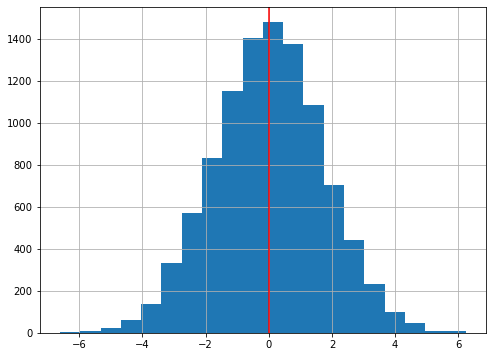

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(paths[:,nstep*t], bins=20)
plt.axvline(mean, color='r')
plt.grid()

#### 3. 求$\tau_m \leq t$的概率，即在时间$t$内路径达到或超过m的条数

In [50]:
m = 2
actual_prob = np.sum(paths.max(axis=1) >= m) / npaths
actual_prob

0.2485

#### 4. $\tau_m \leq t$的理论概率

In [51]:
import scipy.stats as st

theoretical_prob = 2 * (1-st.norm.cdf(m/np.sqrt(t), 0, 1))
theoretical_prob

0.24821307898992373

>实际值与理论值的差异百分率

In [52]:
np.abs(actual_prob - theoretical_prob) / theoretical_prob * 100

0.11559463797953867

#### 5. 循环方法

> 如以上步骤1中生成的`[npath, nstep*t]`维矩阵超出内存，可用以下循环形式解决

In [53]:
npaths = 10000
nstep = 10000

path_max = []
for i in range(npaths):
    paths_ = random.normal(loc=0, scale=np.sqrt(1/nstep), size=(nstep*t))
    paths_ = paths_.cumsum()
    path_max.append(paths_.max())
path_max = np.array(path_max)
actual_prob = np.sum(path_max >= m) / npaths

print(actual_prob)
print(theoretical_prob)
print(np.abs(actual_prob - theoretical_prob) / theoretical_prob * 100)

0.2489
0.24821307898992373
0.2767465005758886


#### 6. 对称性

In [54]:
actual_prob = np.sum(paths.min(axis=1) <= -m) / npaths
actual_prob

0.2522

### 3.7.3 小规模示例

In [55]:
npaths = 10
nstep = 100
t = 5

steps = np.append(np.arange(0, t, 1/nstep), t)
paths = random.normal(loc=0, scale=np.sqrt(1/nstep), size=(npaths, nstep*t))
paths = np.append(np.zeros((npaths, 1)), paths, axis=1)
paths = paths.cumsum(1)

In [56]:
mean = paths[:,nstep*t].mean()
var = paths[:,nstep*t].var()

print("sample_mean = %f" % mean)
print("sample_var = %f" % var)

sample_mean = 0.077913
sample_var = 2.815512


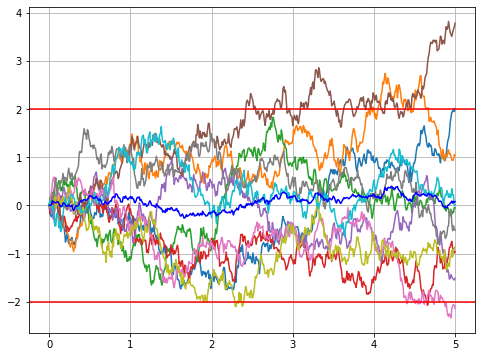

In [57]:
plt.figure(figsize=(8, 6))
for i in range(npaths):
    plt.plot(steps, paths[i])
plt.plot(steps, paths.mean(axis=0), color = 'b')
plt.axhline(2, color='r')
plt.axhline(-2, color='r')
plt.grid()

In [58]:
m = 2
actual_prob = np.sum(paths.max(axis=1) >= m) / npaths
actual_prob

0.3

In [59]:
theoretical_prob = 2 * (1-st.norm.cdf(m/np.sqrt(t), 0, 1))
theoretical_prob

0.37109336952269745

In [60]:
actual_prob = np.sum(paths.min(axis=1) <= -m) / npaths
actual_prob

0.3

### 3.8 番外

### 3.8.1 对数正态分布

在概率论与统计学中，任意随机变量的`对数`服从`正态分布`，则这个随机变量服从的分布称为`对数正态分布`。即如果$Y$是正态分布的随机变量，则$\exp(Y)$为对数正态分布；同样，如果$X$是对数正态分布，则$\ln(X)$为正态分布。如果一个变量可以看做是许多很小独立因子的乘积，则这个变量可以看做是[对数正态分布]()。一个典型的例子是股票投资的长期收益率，他可以看作是每天收益率的乘积。

对于$Y \sim N(\mu, \sigma)$，$X = e ^ Y$，对数正态分布$X$的概率密度函数为

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi} x \sigma} e ^ {-\frac{(\ln x - \mu) ^ 2}{2 \sigma ^ 2}} \ \ \text{for} \ \sigma \geq 0 \ \text{and} \ -\infty \leq \mu \leq \infty . 
$$

其值域为$x \in [0, +\infty)$

其期望值及方差分别为

$$
\mathbb{E}(X) = e ^ {\mu + \sigma ^ 2 / 2}
$$

$$
\mathbb{Var}(X) = (e ^ {\sigma ^ 2} - 1) e ^ {2 \mu + \sigma ^ 2}
$$

### 3.8.2 几何布朗运动

由上面3.2.7节我们知道估价过程服从几何布朗运动，即

$$
S_t = S_0 \exp \left( \sigma W(t) + (r - \frac{\sigma^2}{2})t\right) \tag{1.31}
$$

将上式做对数变换后即得

$$
\ln \left( \frac{S_t}{S_0} \right) = \sigma W(t) + (r - \frac{\sigma^2}{2})t
$$

$Y = \ln \left( \frac{S_t}{S_0} \right)$服从正态分布，且$Y \sim N \left( (r - \frac{\sigma^2}{2})t, \ \sigma \sqrt{t} \right)$ 即$\hat{\mu} = (r - \frac{\sigma^2}{2})t$， $\hat{\sigma} = \sigma \sqrt{t}$

将$\hat{\mu}$和$\hat{\sigma}$分别带入对数正态分布的期望和方差公式，即得

$$
\mathbb{E}(e ^ Y) = e ^ {\hat{\mu} + \hat{\sigma} ^ 2 / 2}
$$

$$
\mathbb{Var}(e ^ Y) = (e ^ {\hat{\sigma} ^ 2} - 1) e ^ {2 \hat{\mu} + \hat{\sigma} ^ 2}
$$

进一步整理后即可得到：

$$
\mathbb{E} (S_t) = S_0 e ^ {r t}
$$

$$
\mathbb{Var}(S_t) = S_0 ^ 2 e ^ {2 r t} \left( e ^ {\sigma ^ 2 t} - 1\right)
$$